In [1]:
with open("README") as f:
    for line in f:
        print(line, end="")


This is an experiment that tries to quantify the utility of GREV and BEXT/BDEP
instructions over just rotate-shift for generating arbitrary bit permutations.

See here for results:
http://nbviewer.jupyter.org/url/svn.clifford.at/handicraft/2017/permsyn/data.ipynb

See here for the source code:
http://svn.clifford.at/handicraft/2017/permsyn/


SUMMARY OF RESULTS

I generated 1600 problems (50 problems for each number of used bits in the
range 1..32) and synthesized programs for all of those examples for different
version of the ISA: (1) Just ROT, (2) ROT+GREV, and (3) ROT+GREV+BEXT/BDEP.

In this test, adding GREV to the ISA reduces the size of the programs by about
30%. Adding GREV+BEXT/BDEP reduces the size of the programs by about 70%.

Or in other words: Adding GREV+BEXT/BDEP produces programs that are about 3x
smaller than programs without GREV+BEXT/BDEP, and about 2x smaller than
programs with GREV but without BEXT/BDEP.

The faster ("simple") algorithm produces only about 7% wor

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data.txt")

# add some noise so plot is easier to read
# (without this points will be drawn ontop of each other and it
# becomes impossible to distinguish one point from many points)
data += np.random.uniform(-0.3, +0.3, data.shape)

# fit some straight lines

slopes = list()

X = data[:,0]
for i in range(4):
    Y = data[:,i+1]
    xy = np.dot(X, Y)
    yy = np.dot(Y, Y)
    slopes.append(yy / xy)

slopes = np.array(slopes)

print("relative slopes: %s" % np.array(100*slopes/slopes[-1], np.int))

# this should give approximately the same results

sums = np.sum(data[:,1:], axis=0)
print("relative sums:   %s" % np.array(100*sums/sums[-1], np.int))

relative slopes: [337 211 107 100]
relative sums:   [330 210 107 100]


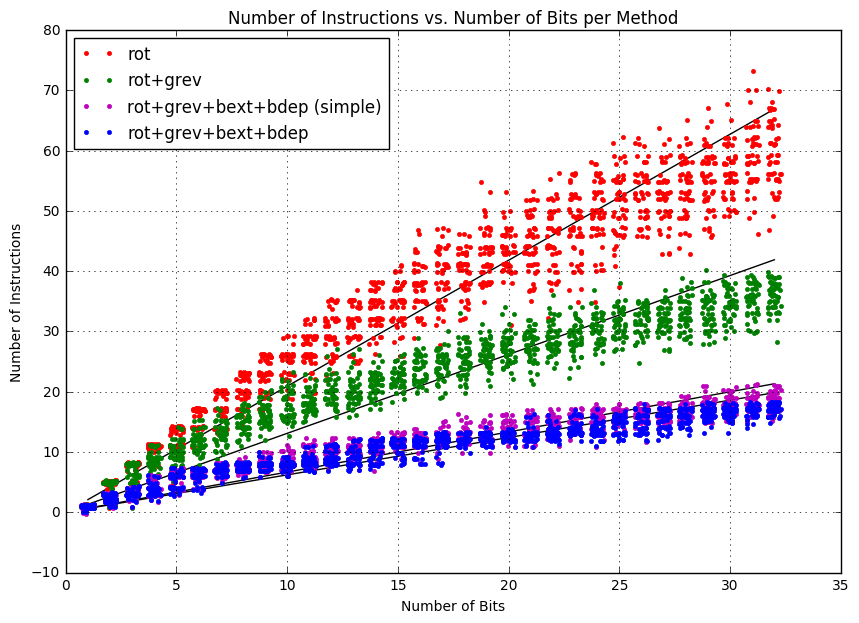

In [3]:
plt.figure(figsize=(10, 7))
plt.title("Number of Instructions vs. Number of Bits per Method")
plt.xlabel("Number of Bits")
plt.ylabel("Number of Instructions")

for i in range(4):
    plt.plot([1, 32], [slopes[i], 32*slopes[i]], "k-")

plt.plot(data[:,0], data[:,1], "r.", label="rot")
plt.plot(data[:,0], data[:,2], "g.", label="rot+grev")
plt.plot(data[:,0], data[:,3], "m.", label="rot+grev+bext+bdep (simple)")
plt.plot(data[:,0], data[:,4], "b.", label="rot+grev+bext+bdep")

plt.legend(loc='upper left')
plt.grid()
plt.show()

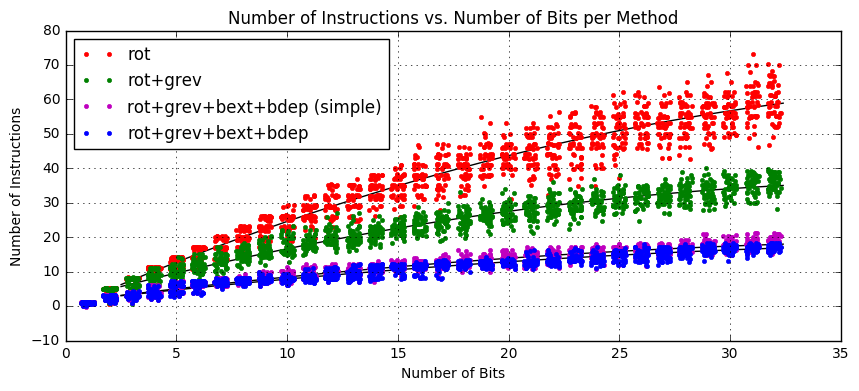

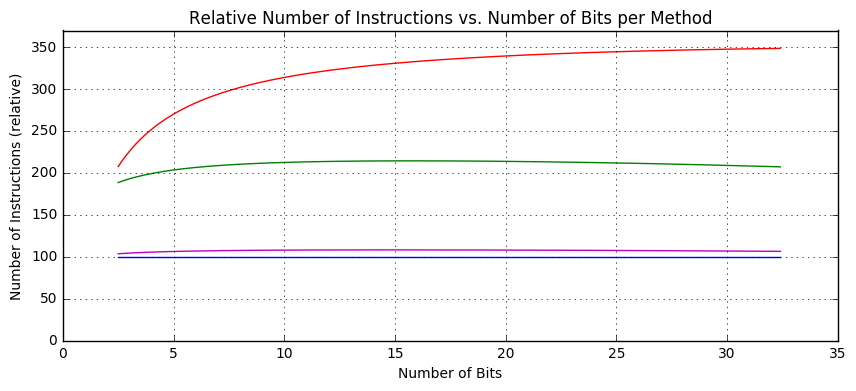

In [4]:
# Better fit using 2nd order polynimials

poly = np.array([np.polyfit(data[:,0], data[:,i], 2) for i in range(1, 5)])

plt.figure(figsize=(10, 4))
plt.title("Number of Instructions vs. Number of Bits per Method")
plt.xlabel("Number of Bits")
plt.ylabel("Number of Instructions")

X = np.arange(2.5, 32.5, 0.1)
Y = np.array([poly[i, 2] + X*poly[i, 1] + X*X*poly[i, 0] for i in range(4)]).T

for i in range(4):
    plt.plot(X, Y[:, i], "k-")

plt.plot(data[:,0], data[:,1], "r.", label="rot")
plt.plot(data[:,0], data[:,2], "g.", label="rot+grev")
plt.plot(data[:,0], data[:,3], "m.", label="rot+grev+bext+bdep (simple)")
plt.plot(data[:,0], data[:,4], "b.", label="rot+grev+bext+bdep")

plt.legend(loc='upper left')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.title("Relative Number of Instructions vs. Number of Bits per Method")
plt.xlabel("Number of Bits")
plt.ylabel("Number of Instructions (relative)")

plt.plot(X, 100 * Y[:,0]/Y[:,3], "r", label="rot")
plt.plot(X, 100 * Y[:,1]/Y[:,3], "g", label="rot+grev")
plt.plot(X, 100 * Y[:,2]/Y[:,3], "m", label="rot+grev+bext+bdep (simple)")
plt.plot(X, 100 * Y[:,3]/Y[:,3], "b", label="rot+grev+bext+bdep")

plt.xlim(0, 35)
plt.ylim(0, 370)

# plt.legend(loc='lower left')
plt.grid()
plt.show()